In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shots = pd.read_csv('shot_logs.csv')

shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
print(shots['SHOT_RESULT'].value_counts())

missed    70164
made      57905
Name: SHOT_RESULT, dtype: int64


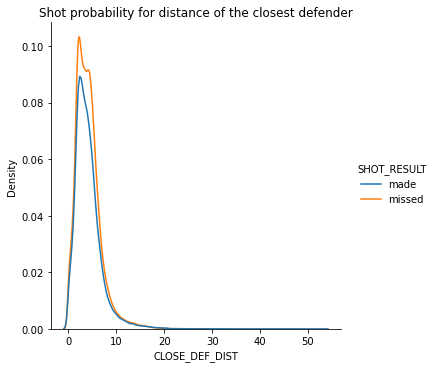

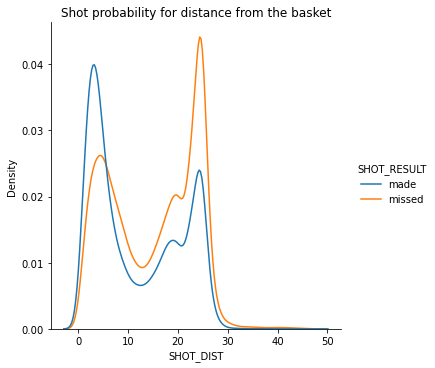

In [4]:
f = sns.displot(data=shots, x="CLOSE_DEF_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance of the closest defender")
plt.show()

f = sns.displot(data=shots, x="SHOT_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance from the basket")
plt.show()


In [5]:
def check_missing_data(df: pd.DataFrame) -> None:
    found = False
    for _, column in enumerate(df):
        if shots[column].isnull().any():
            found = True
            print(f"{column} number on missing values is {shots[column].isnull().sum()}")

    if not(found):
        print("There are no missing values in the dataset!")

check_missing_data(shots)

SHOT_CLOCK number on missing values is 5567


In [6]:
def change_values(column, final_val, is_column_name = True, condition = lambda x: pd.isnull(x), transformations = lambda x: x):
    for i, elem in enumerate(shots[column]):
        if condition(elem):
            shots.loc[i, column] = (transformations(shots.loc[i, final_val]) if is_column_name else final_val)

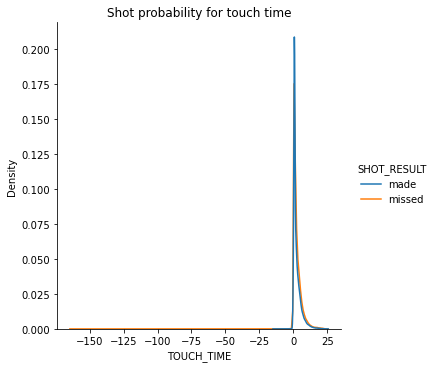

-163.6


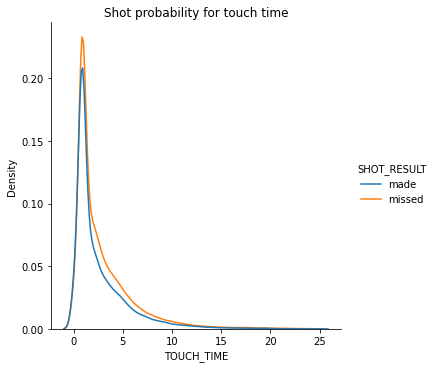

0.0


In [7]:
f = sns.displot(data=shots, x="TOUCH_TIME", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for touch time")
plt.show()

print(shots['TOUCH_TIME'].min())
change_values('TOUCH_TIME', 0, False, lambda x: x < 0)

f = sns.displot(data=shots, x="TOUCH_TIME", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for touch time")
plt.show()

print(shots['TOUCH_TIME'].min())

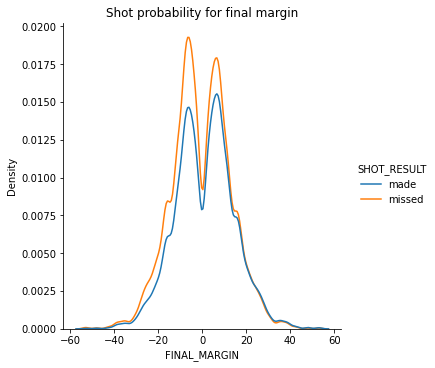

In [8]:
f = sns.displot(data=shots, x="FINAL_MARGIN", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for final margin")
plt.show()

720


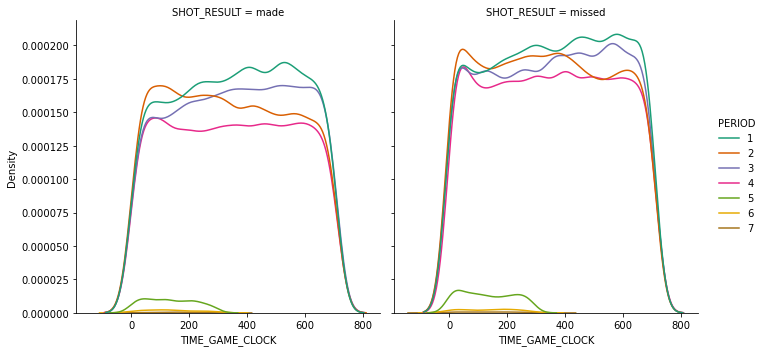

In [9]:
shots['TIME_GAME_CLOCK'] = pd.to_datetime(shots['GAME_CLOCK'],format= '%M:%S' ).dt.minute * 60 + pd.to_datetime(shots['GAME_CLOCK'],format= '%M:%S' ).dt.second
print(shots['TIME_GAME_CLOCK'].max())
f = sns.displot(data=shots, x="TIME_GAME_CLOCK", kind='kde', hue='PERIOD', col='SHOT_RESULT', palette='Dark2')

plt.show()

In [10]:
#preparing data for all numerical methods

shots['GAME_TIME'] = shots.apply(lambda row: (((row['PERIOD'] - 1) * 12 * 60 + (12 * 60 - row['TIME_GAME_CLOCK'])) if row['PERIOD'] <= 4 
                        else ((row['PERIOD'] - 5) * 5 * 60 + (5 * 60 - row['TIME_GAME_CLOCK'])) + 4 * 12 * 60), axis=1)


shots['GAME_TIME'].max()

3777

There are no missing values in the dataset!


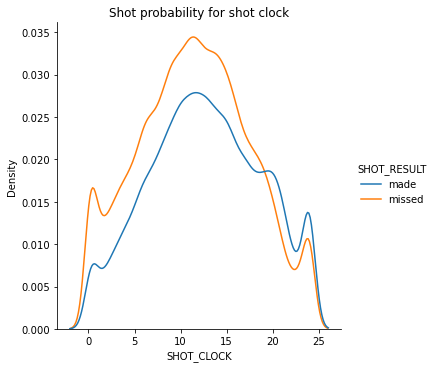

24.0


In [11]:
import math

change_values('SHOT_CLOCK', 'TIME_GAME_CLOCK', transformations=lambda x: float(f"{math.floor(x/60)}.{x%60}"))
check_missing_data(shots)

f = sns.displot(data=shots, x="SHOT_CLOCK", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for shot clock")
plt.show()

print(shots['SHOT_CLOCK'].max())

In [15]:
shots.head()
print(shots.columns)

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'TIME_GAME_CLOCK', 'GAME_TIME'],
      dtype='object')


In [18]:
X = shots[['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST', 'CLOSE_DEF_DIST', 'GAME_TIME']]

y = shots[['FGM']]

X.corr()

,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,GAME_TIME
FINAL_MARGIN,1.000000,0.000836,-0.002441,0.011242,0.008876,0.033064,-0.004285
SHOT_NUMBER,0.000836,1.000000,-0.048911,0.146573,0.011541,-0.037769,0.687602
SHOT_CLOCK,-0.002441,-0.048911,1.000000,-0.146494,-0.183474,0.023276,-0.074623
TOUCH_TIME,0.011242,0.146573,-0.146494,1.000000,-0.085979,-0.166664,0.069761
SHOT_DIST,0.008876,0.011541,-0.183474,-0.085979,1.000000,0.523192,0.034030
CLOSE_DEF_DIST,0.033064,-0.037769,0.023276,-0.166664,0.523192,1.000000,-0.011336
GAME_TIME,-0.004285,0.687602,-0.074623,0.069761,0.034030,-0.011336,1.000000


In [14]:
from sklearn.linear_model import LogisticRegression
